<a href="https://colab.research.google.com/github/Nandinishyam/Machine_learning/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data() #loading the data


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Normalize the pixel values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0



In [ ]:
#Convert the labels to one hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)




In [ ]:
#Get the class names
class_names = ['airplanes', 'automobiles', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
#Data processing and Augmentation
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
)

In [ ]:
X_Gen = datagen.fit(X_train)


In [ ]:


# Building the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Correct input shape, assuming 32x32 RGB images
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))



In [ ]:
#Flatten the output
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


In [ ]:
#complie the data
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
#define epoch and batch size
epochs = 20
batch_size = 64


In [ ]:
# Train the model with corrected formatting and parameters
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),  # Training data generator
    steps_per_epoch=len(X_train) // batch_size,  # Number of steps per epoch
    epochs=epochs,  # Number of epochs
    validation_data=(X_test, y_test)  # Validation data
)



Epoch 1/20
781/781 [==============================] - 101s 129ms/step - loss: 1.2208 - accuracy: 0.5670 - val_loss: 1.1062 - val_accuracy: 0.6069
Epoch 2/20
781/781 [==============================] - 90s 115ms/step - loss: 1.1526 - accuracy: 0.5916 - val_loss: 1.0685 - val_accuracy: 0.6314
Epoch 3/20
781/781 [==============================] - 91s 117ms/step - loss: 1.0997 - accuracy: 0.6121 - val_loss: 1.0733 - val_accuracy: 0.6208
Epoch 4/20
781/781 [==============================] - 90s 115ms/step - loss: 1.0597 - accuracy: 0.6257 - val_loss: 0.9119 - val_accuracy: 0.6873
Epoch 5/20
781/781 [==============================] - 90s 115ms/step - loss: 1.0252 - accuracy: 0.6388 - val_loss: 0.9054 - val_accuracy: 0.6850
Epoch 6/20
781/781 [==============================] - 92s 117ms/step - loss: 0.9986 - accuracy: 0.6481 - val_loss: 0.8599 - val_accuracy: 0.7008
Epoch 7/20
781/781 [==============================] - 92s 118ms/step - loss: 0.9730 - accuracy: 0.6564 - val_loss: 0.8399 - val_a

313/313 - 5s - loss: 1.1454 - accuracy: 0.5933 - 5s/epoch - 15ms/step


KeyError: 'validation_accuracy'

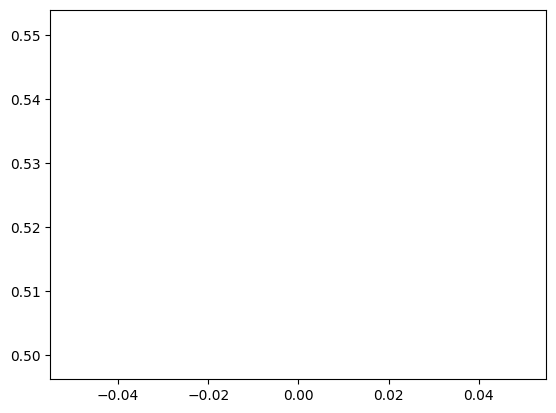

In [ ]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 2)
#Plot the training and validation accuracy over epoch
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()
